In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [79]:
url = "https://raw.githubusercontent.com/DKuntal2703/Online_Shoppers_Intention/main/online_shoppers_intention.csv"
data = pd.read_csv(url)

In [80]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [81]:
data.shape

(12330, 18)

In [82]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [83]:
data.dtypes

,0
Administrative,int64
Administrative_Duration,float64
Informational,int64
Informational_Duration,float64
ProductRelated,int64
ProductRelated_Duration,float64
BounceRates,float64
ExitRates,float64
PageValues,float64
SpecialDay,float64


In [84]:
data.values

array([[0, 0.0, 0, ..., 'Returning_Visitor', False, False],
       [0, 0.0, 0, ..., 'Returning_Visitor', False, False],
       [0, 0.0, 0, ..., 'Returning_Visitor', False, False],
       ...,
       [0, 0.0, 0, ..., 'Returning_Visitor', True, False],
       [4, 75.0, 0, ..., 'Returning_Visitor', False, False],
       [0, 0.0, 0, ..., 'New_Visitor', True, False]], dtype=object)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [86]:
data.index

RangeIndex(start=0, stop=12330, step=1)

In [87]:
data.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6404,0,0.000000,0,0.00,3,60.400000,0.000000,0.066667,0.000000,0.0,Sep,1,1,1,5,Returning_Visitor,False,False
8655,17,346.709640,3,207.25,292,8282.214508,0.000977,0.005670,13.918324,0.0,Nov,2,2,1,2,Returning_Visitor,True,False
2903,4,60.000000,0,0.00,33,841.033333,0.015152,0.043434,0.000000,0.4,May,2,1,7,4,Returning_Visitor,False,False
5890,6,141.058333,0,0.00,46,1728.866268,0.000000,0.019060,0.000000,0.0,June,2,2,7,4,Returning_Visitor,False,False
11942,0,0.000000,0,0.00,11,350.375000,0.018182,0.011688,0.000000,0.0,Nov,3,2,3,2,New_Visitor,False,False
7170,2,20.200000,0,0.00,27,2129.800000,0.012903,0.051613,6.476760,0.0,Sep,2,6,3,3,Returning_Visitor,False,True
4008,0,0.000000,0,0.00,2,3.000000,0.000000,0.100000,0.000000,0.6,May,2,10,3,1,Returning_Visitor,False,False
2492,0,0.000000,0,0.00,5,28.000000,0.120000,0.160000,0.000000,0.4,May,3,2,4,3,Returning_Visitor,False,False
11668,0,0.000000,0,0.00,7,649.500000,0.028571,0.057143,0.000000,0.0,Dec,2,2,4,2,New_Visitor,False,True
9411,0,0.000000,0,0.00,10,249.000000,0.040000,0.064000,0.000000,0.0,Nov,1,1,8,3,Returning_Visitor,False,False


In [88]:
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


##Exploratory Data Analysis

In [89]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [90]:
data.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


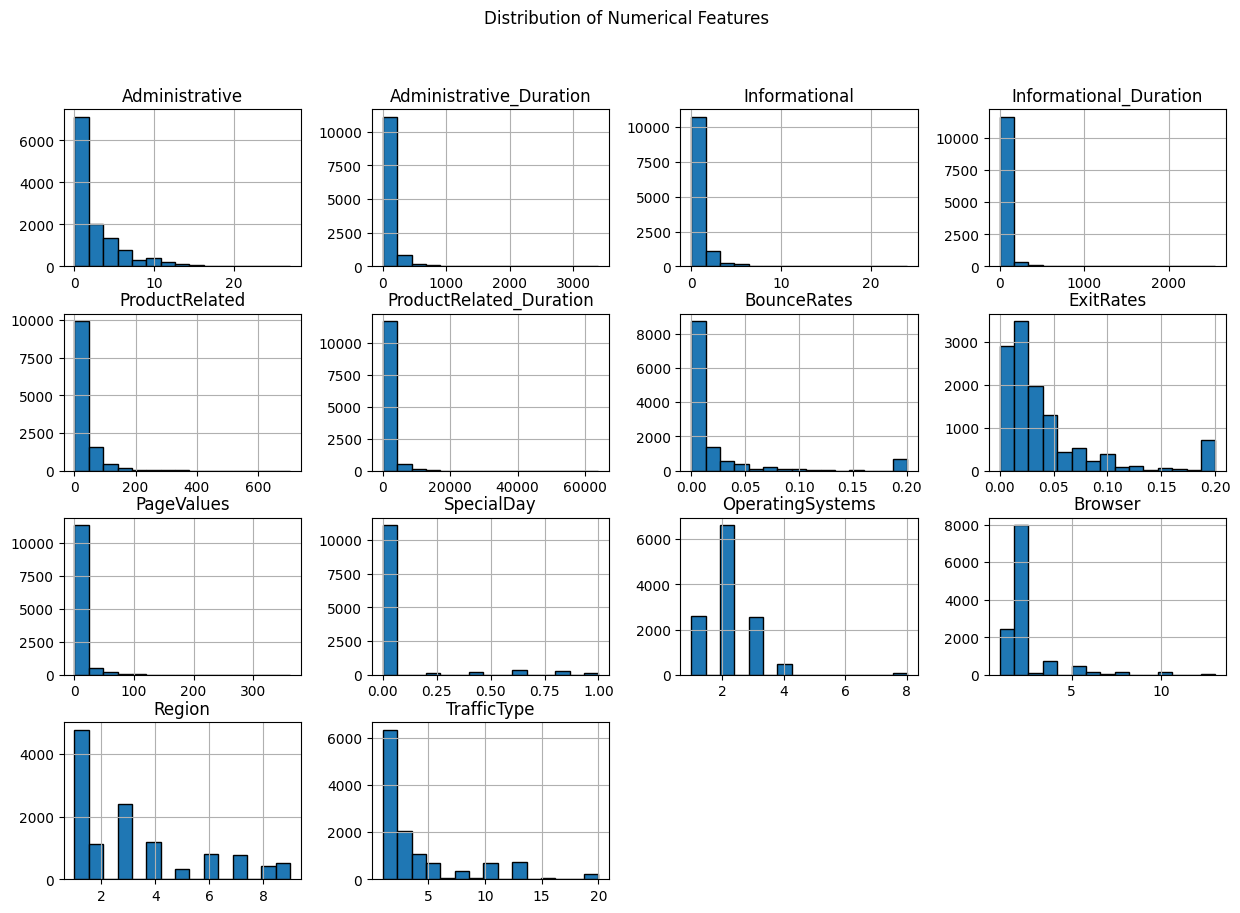

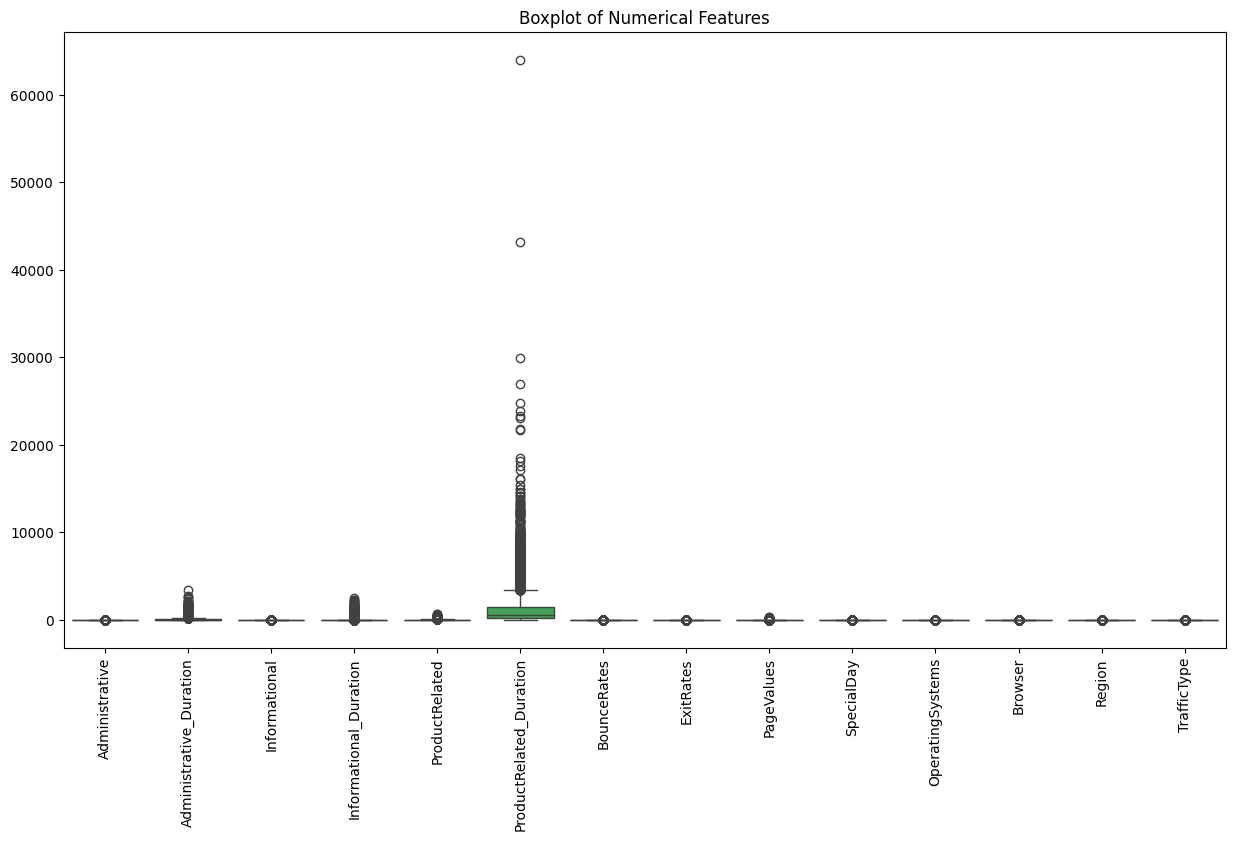

In [91]:
# Plot histograms for numerical columns
data.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Boxplot for each numerical feature to check for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.drop(['Revenue', 'Weekend'], axis=1))
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

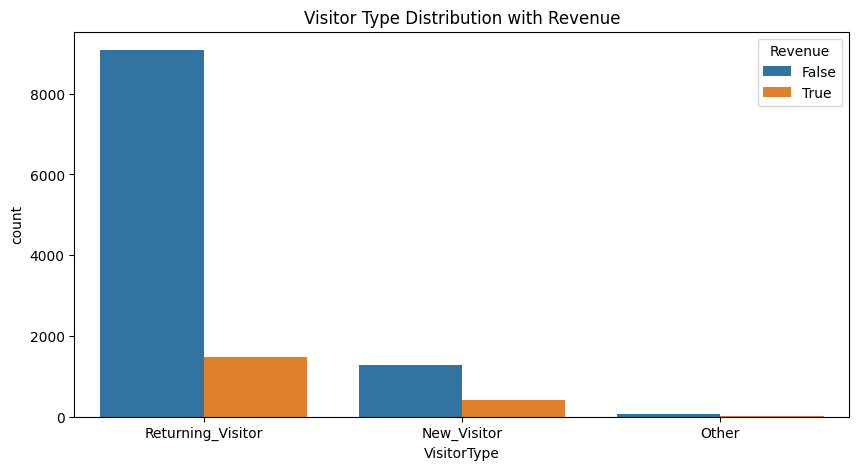

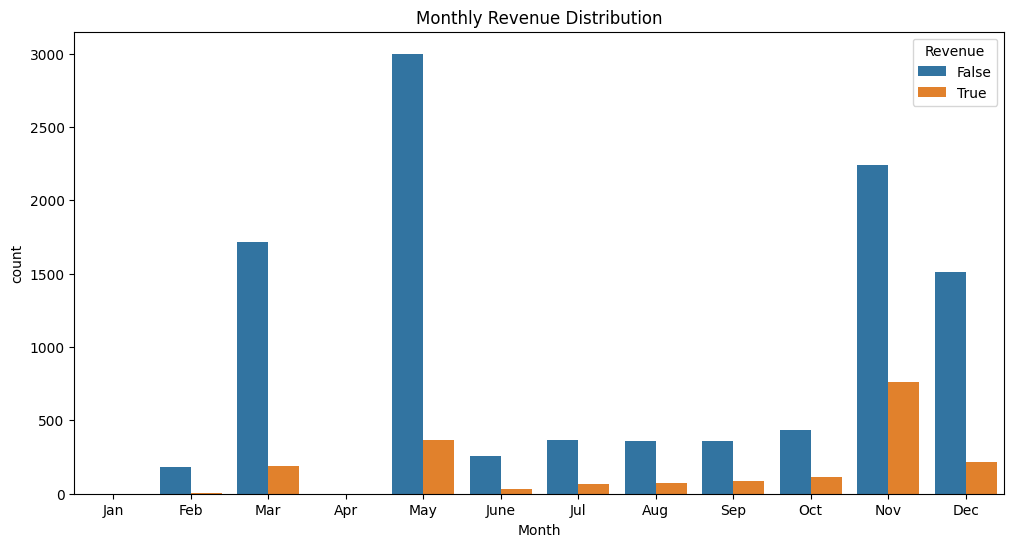

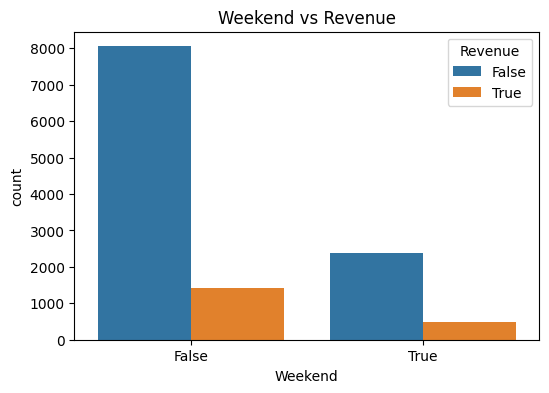

In [92]:
# Plotting count of VisitorType with respect to Revenue
plt.figure(figsize=(10, 5))
sns.countplot(x='VisitorType', hue='Revenue', data=data)
plt.title("Visitor Type Distribution with Revenue")
plt.show()

# Plotting Revenue by Month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Revenue', data=data, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Monthly Revenue Distribution")
plt.show()

# Plotting Weekend vs Revenue
plt.figure(figsize=(6, 4))
sns.countplot(x='Weekend', hue='Revenue', data=data)
plt.title("Weekend vs Revenue")
plt.show()

In [93]:
# Converting categorical variables (Month, VisitorType) into dummy/one-hot encoded variables
data_encoded = pd.get_dummies(data, columns=['Month', 'VisitorType'], drop_first=True)

# Ensuring Weekend and Revenue are in integer format (some ML algorithms may require this)
data_encoded['Weekend'] = data_encoded['Weekend'].astype(int)
data_encoded['Revenue'] = data_encoded['Revenue'].astype(int)

# Summary statistics for numerical columns
print("Summary statistics:\n", data_encoded.describe())

Summary statistics:
        Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.

Correlation matrix                                Administrative  Administrative_Duration  \
Administrative                       1.000000                 0.601583   
Administrative_Duration              0.601583                 1.000000   
Informational                        0.376850                 0.302710   
Informational_Duration               0.255848                 0.238031   
ProductRelated                       0.431119                 0.289087   
ProductRelated_Duration              0.373939                 0.355422   
BounceRates                         -0.223563                -0.144170   
ExitRates                           -0.316483                -0.205798   
PageValues                           0.098990                 0.067608   
SpecialDay                          -0.094778                -0.073304   
OperatingSystems                    -0.006347                -0.007343   
Browser                             -0.025035                -0.015392   
Region             

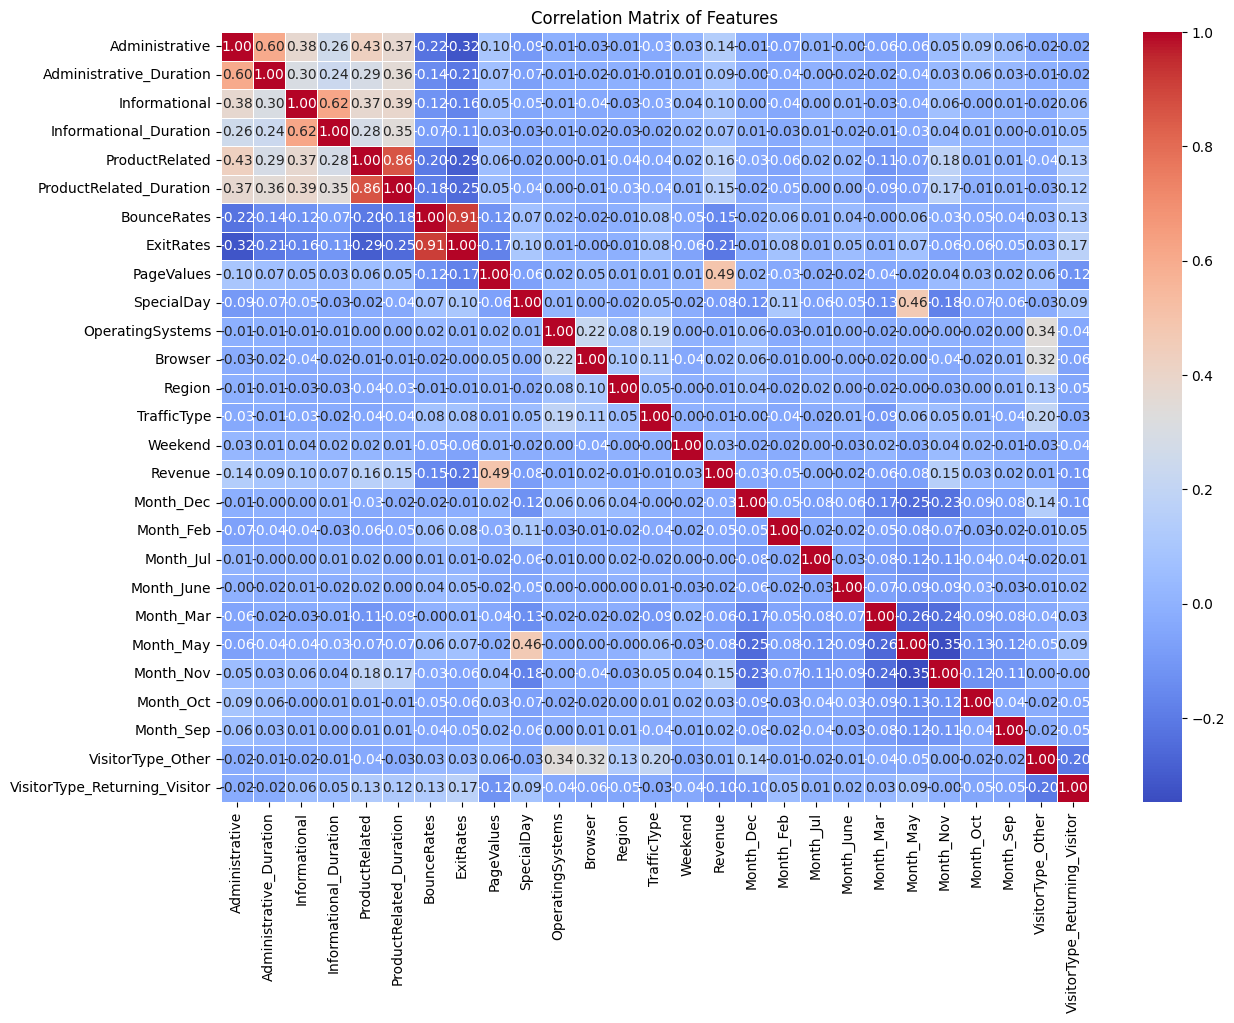

In [94]:
# Computing correlation matrix
correlation_matrix = data_encoded.corr()
print("Correlation matrix", data_encoded.corr())

# Plotting heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

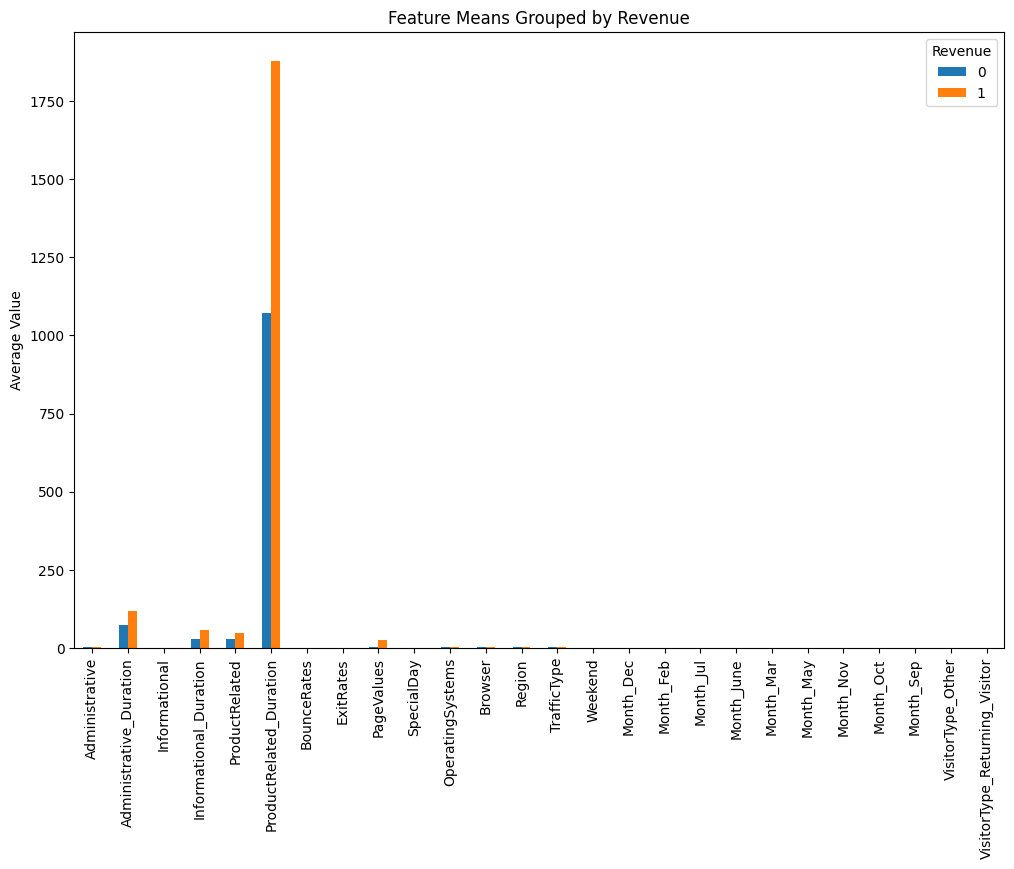

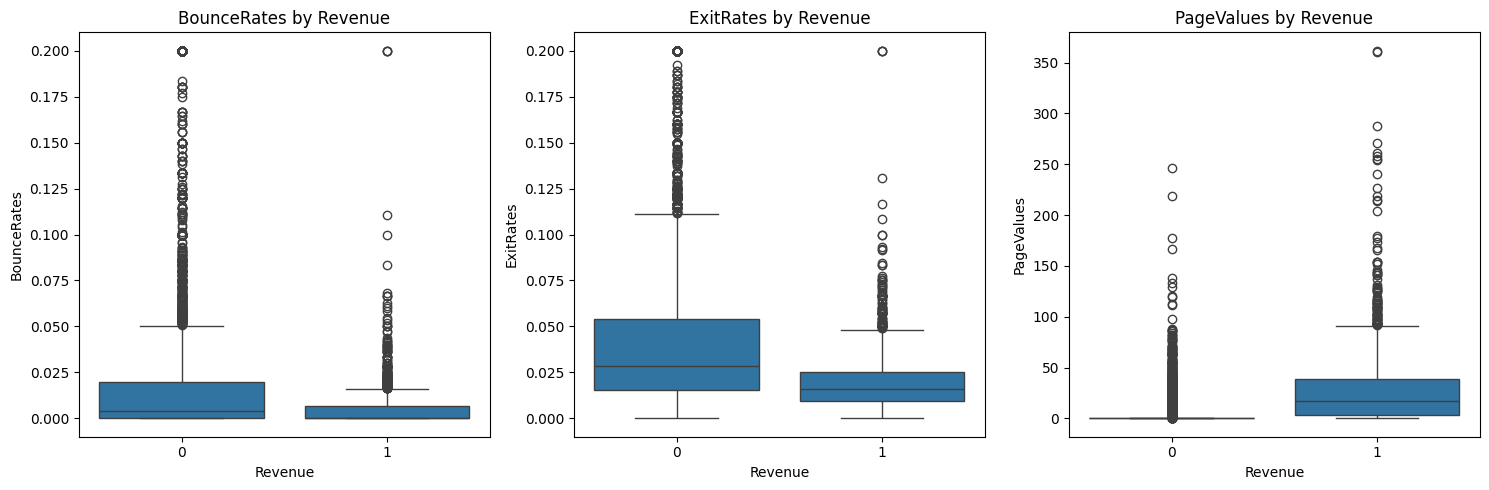

In [95]:
# Revenue Analysis

# Average values of numerical features grouped by Revenue
revenue_analysis = data_encoded.groupby('Revenue').mean()

# Plotting grouped means
revenue_analysis.T.plot(kind='bar', figsize=(12, 8), title="Feature Means Grouped by Revenue")
plt.ylabel("Average Value")
plt.show()

# Examining BounceRates, ExitRates, PageValues based on Revenue
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Revenue', y='BounceRates', data=data_encoded)
plt.title("BounceRates by Revenue")

plt.subplot(1, 3, 2)
sns.boxplot(x='Revenue', y='ExitRates', data=data_encoded)
plt.title("ExitRates by Revenue")

plt.subplot(1, 3, 3)
sns.boxplot(x='Revenue', y='PageValues', data=data_encoded)
plt.title("PageValues by Revenue")
plt.tight_layout()
plt.show()

In [96]:
# Dropping target variable for clustering and scale the features
X_cluster = data.drop('Revenue', axis=1)

# Encoding categorical variables
X_cluster = pd.get_dummies(X_cluster, columns=['Month', 'VisitorType'], drop_first=True)
X_cluster['Weekend'] = X_cluster['Weekend'].astype(int)

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Optionally, reduce dimensions using PCA for better clustering performance
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

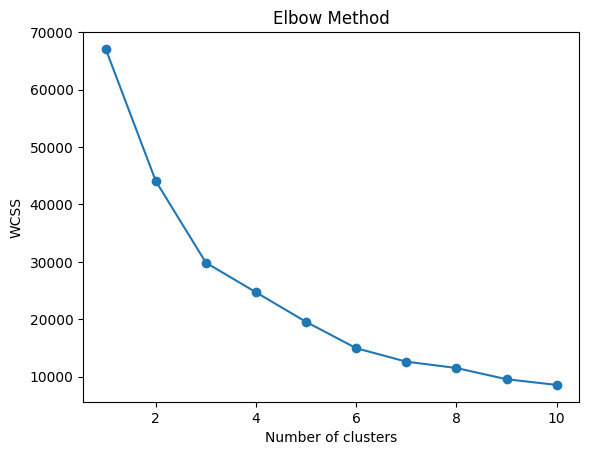

In [97]:
# Determine optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [98]:
# Fitting KMeans with the chosen number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to the original data
data_encoded['Cluster'] = clusters

In [99]:
# Calculating silhouette score
sil_score = silhouette_score(X_pca, clusters)
sil_score

0.4296367194383003

In [100]:
# Displaying the average values of features for each cluster
# Selecting only numerical features for calculating the mean
numerical_features = data_encoded.select_dtypes(include=np.number).columns
cluster_analysis = data_encoded.groupby('Cluster')[numerical_features].mean()
cluster_analysis

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Cluster
Cluster,,,,,,,,,,,,,,,,,
0,0.291318,7.563842,0.062833,1.992247,10.941736,351.932671,0.078048,0.105725,0.407890,0.241051,2.034273,2.149276,2.838157,4.421935,0.170982,0.017898,0.0
1,2.016379,61.909758,0.264655,10.557534,24.833990,916.474028,0.007241,0.027425,7.006393,0.008842,2.166502,2.466502,3.310468,4.059483,0.246182,0.172906,1.0
2,7.202020,299.194181,2.458965,210.912781,101.555556,4018.482696,0.006231,0.019421,9.249696,0.033207,2.054924,2.140783,2.823864,3.537247,0.265152,0.288510,2.0


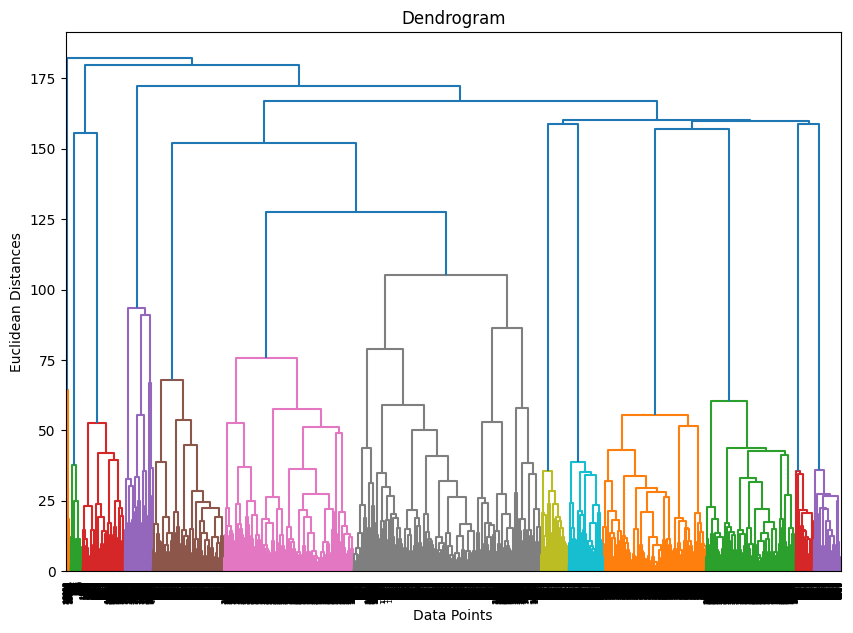

In [101]:
# Plotting dendrogram to determine optimal clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distances")
plt.show()

# Applying Hierarchical Clustering with chosen number of clusters
hier_clust = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = hier_clust.fit_predict(X_scaled)

# Adding cluster labels to the data
data_encoded['Cluster'] = clusters

In [102]:
# Reducing dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Applying KMeans on reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
pca_clusters = kmeans.fit_predict(X_pca)

# Adding cluster labels to the data
data_encoded['Cluster'] = pca_clusters

In [103]:
# Calculating mean values for each feature grouped by clusters
cluster_summary = data_encoded.groupby('Cluster').mean()
cluster_summary['Cluster Size'] = data_encoded['Cluster'].value_counts()
print(cluster_summary)

         Administrative  Administrative_Duration  Informational  \
Cluster                                                           
0              0.291318                 7.563842       0.062833   
1              2.016379                61.909758       0.264655   
2              7.202020               299.194181       2.458965   

         Informational_Duration  ProductRelated  ProductRelated_Duration  \
Cluster                                                                    
0                      1.992247       10.941736               351.932671   
1                     10.557534       24.833990               916.474028   
2                    210.912781      101.555556              4018.482696   

         BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Jul  \
Cluster                                                  ...              
0           0.078048   0.105725    0.407890    0.241051  ...   0.020183   
1           0.007241   0.027425    7.006393    0.008842  .

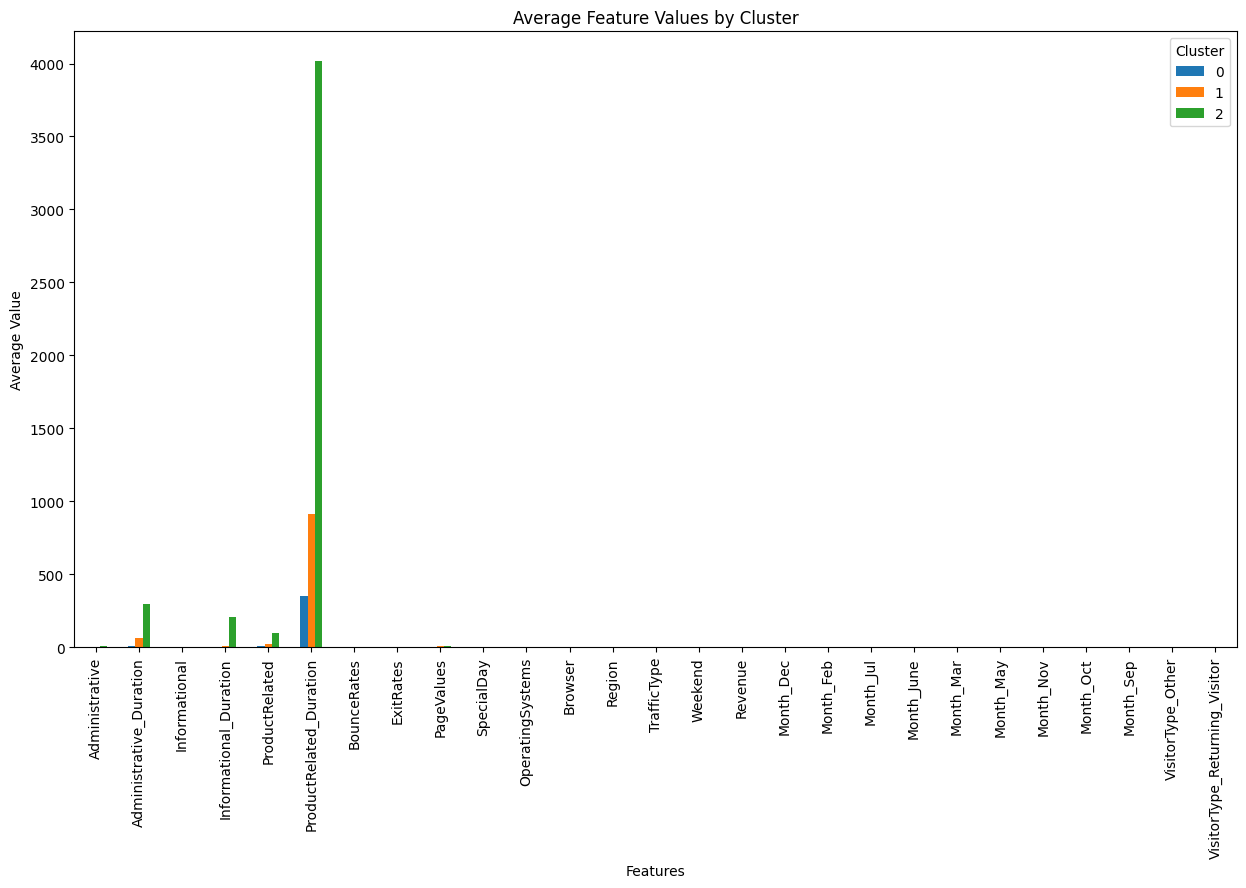

In [104]:
# Plotting feature means for each cluster
cluster_summary.drop(columns=['Cluster Size']).T.plot(kind='bar', figsize=(15, 8))
plt.title("Average Feature Values by Cluster")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.legend(title="Cluster")
plt.show()

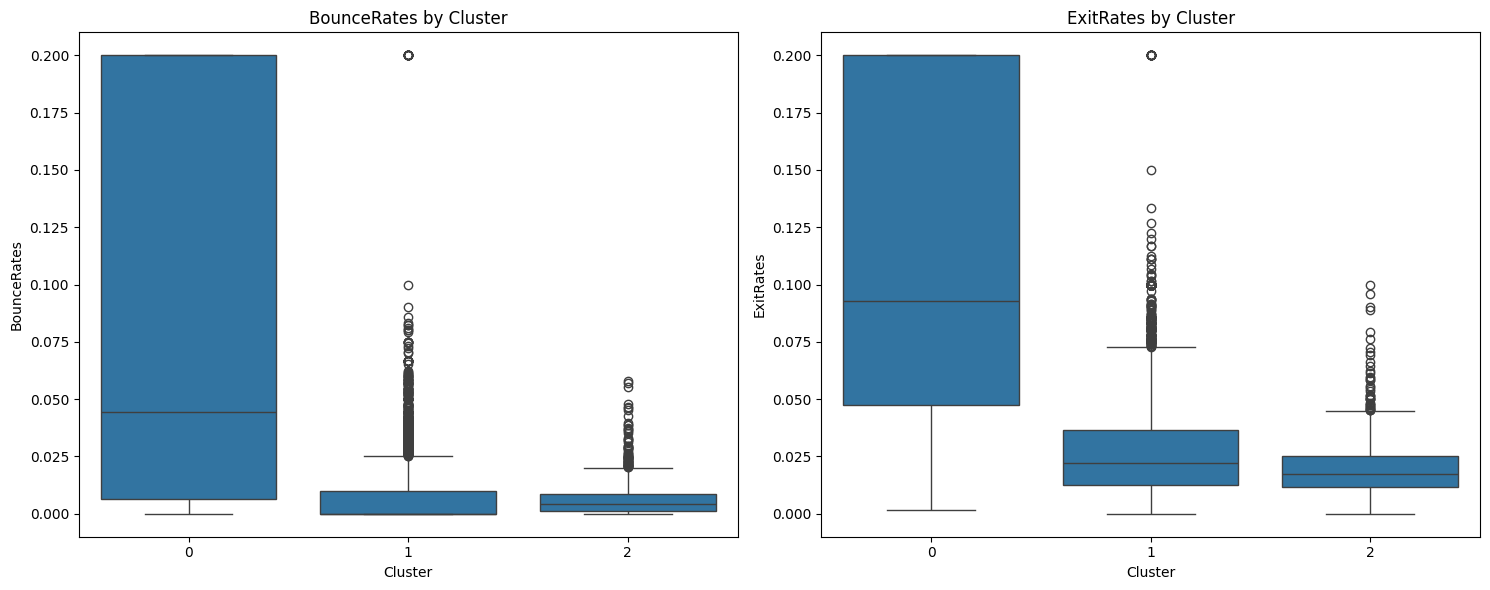

In [107]:
# Plotting BounceRates and ExitRates by cluster
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='BounceRates', data=data_encoded)
plt.title("BounceRates by Cluster")

plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='ExitRates', data=data_encoded)
plt.title("ExitRates by Cluster")

plt.tight_layout()
plt.show()


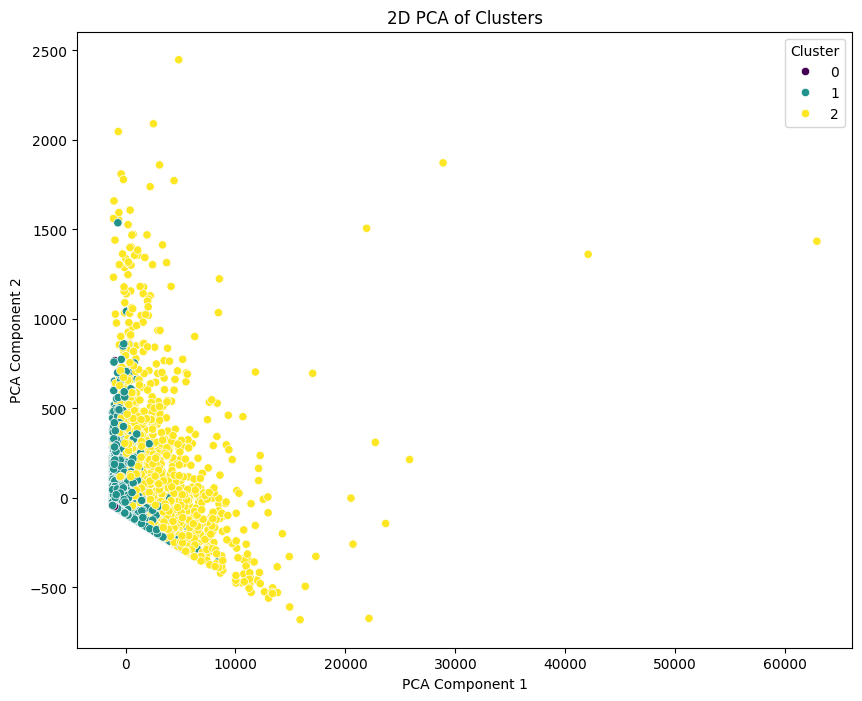

In [109]:
# Applying PCA for 2D visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_encoded.drop(columns=['Cluster', 'Revenue']))  # Exclude target variables

# Plotting PCA-reduced data with cluster labels
plt.figure(figsize=(10, 8))
# Changed data['Cluster'] to data_encoded['Cluster']
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data_encoded['Cluster'], palette='viridis')
plt.title("2D PCA of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()